Description

Identify the level of income qualification needed for the families in Latin America.

### Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.
Following actions should be performed:

 - Identify the output variable.
 - Understand the type of data.
 - Check if there are any biases in your dataset.
 - Check whether all members of the house have the same poverty level.
 - Check if there is a house without a family head.
 - Set poverty level of the members and the head of the house within a family.
 - Count how many null values are existing in columns.
 - Remove null value rows of the target variable.
 - Predict the accuracy using random forest classifier.
 - Check the accuracy using random forest with cross validation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_test=pd.read_csv("test.csv")
df_train=pd.read_csv("train.csv")

In [3]:
print("Test data shape is {}".format(df_test.shape))
print("Train data shape is {}".format(df_train.shape))

Test data shape is (23856, 142)
Train data shape is (9557, 143)


### Train Data has one more variable compared to Test data

In [4]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
df_test.isnull().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBhogar_nin           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Length: 142, dtype: int64

In [6]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [7]:
df_train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [8]:
df_train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [9]:
print("Float Type")
print(df_train.select_dtypes(np.object).columns)

Float Type
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [10]:
for i in df_train.columns:
    var=df_train[i].dtype
    if var=="float64":
        print(i)

v2a1
v18q1
rez_esc
meaneduc
overcrowding
SQBovercrowding
SQBdependency
SQBmeaned


In [11]:
df_test.dtypes.value_counts()

int64      129
float64      8
object       5
dtype: int64

In [12]:
for i in df_test.columns:
    var_test=df_test[i].dtype
    if var_test=="float64":
        print(i)

v2a1
v18q1
rez_esc
meaneduc
overcrowding
SQBovercrowding
SQBdependency
SQBmeaned


### By looking at the above dataset, we can observe the followings:
 - Id is a unique number but not important for ML
 - Target variable is present in train dataset only
 - Some null values in both dataset
 - We see different type of data types. 
 - We need to perform some EDA before starting any model

In [13]:
df_train.select_dtypes("float").isnull().sum()

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

In [14]:
df_train.select_dtypes("float").head(5)

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [15]:
df_train.select_dtypes("int").isnull().sum()

hacdor            0
rooms             0
hacapo            0
v14a              0
refrig            0
                 ..
SQBhogar_total    0
SQBedjefe         0
SQBhogar_nin      0
agesq             0
Target            0
Length: 130, dtype: int64

In [16]:
df_train.select_dtypes("int").head(5)

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [17]:
df_train.select_dtypes("object").isnull().sum()

Id            0
idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64

In [18]:
df_train.select_dtypes("object").head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


### The observation for the train data:
 - No missing values for Int and object data types
 - Some missing values in float data types
 - Object variable has mixed values (Numeric and Categorical)

### Fixing a column with a mixed value
 - dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
 - edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
 - edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 

In [19]:
df_test.select_dtypes("object").head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


### The above variable shows that the "Yes=1" and "No=0". Convert all these variables using mapping

In [20]:
mapping = {"yes":1, "no":0}
for chak in [df_train,df_test]:
    chak["dependency"]= chak["dependency"].replace(mapping).astype(np.float64)
    chak["edjefe"]= chak["edjefe"].replace(mapping).astype(np.float64)
    chak["edjefa"]= chak["edjefa"].replace(mapping).astype(np.float64)

In [21]:
df_train[["dependency", "edjefe","edjefa"]].head(5)

,dependency,edjefe,edjefa
0,0.0,10.0,0.0
1,8.0,12.0,0.0
2,8.0,0.0,11.0
3,1.0,11.0,0.0
4,1.0,11.0,0.0


In [22]:
df_train[["dependency", "edjefe","edjefa"]].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


### Fixing columns with null values

In [23]:
df_train.select_dtypes("float").isnull().sum()

v2a1               6860
v18q1              7342
rez_esc            7928
dependency            0
edjefe                0
edjefa                0
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

### According to the given documentation:
 - v2a1 = Monthly rent payment
 - v18q1 = number of tablets household owns
 - rez_esc = Years behind in school
 - meaneduc = average years of education for adults (18+)
 - SQBmeaned = Square of the mean years of education of adults (>=18) in the household 142

v2a1 = Monthly rent payment. After observing the dataset, the only variable that has a direct link with V2a1 are tipovivi1","tipovivi2", "tipovivi3","tipovivi4","tipovivi4

In [24]:
df_train[["tipovivi1","tipovivi2", "tipovivi3","tipovivi4","tipovivi5"]].head()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [25]:
df_train[["tipovivi1","tipovivi2", "tipovivi3","tipovivi4","tipovivi5"]].value_counts()

tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
1          0          0          0          0            5911
0          0          1          0          0            1736
           1          0          0          0             961
           0          0          0          1             786
                                 1          0             163
dtype: int64

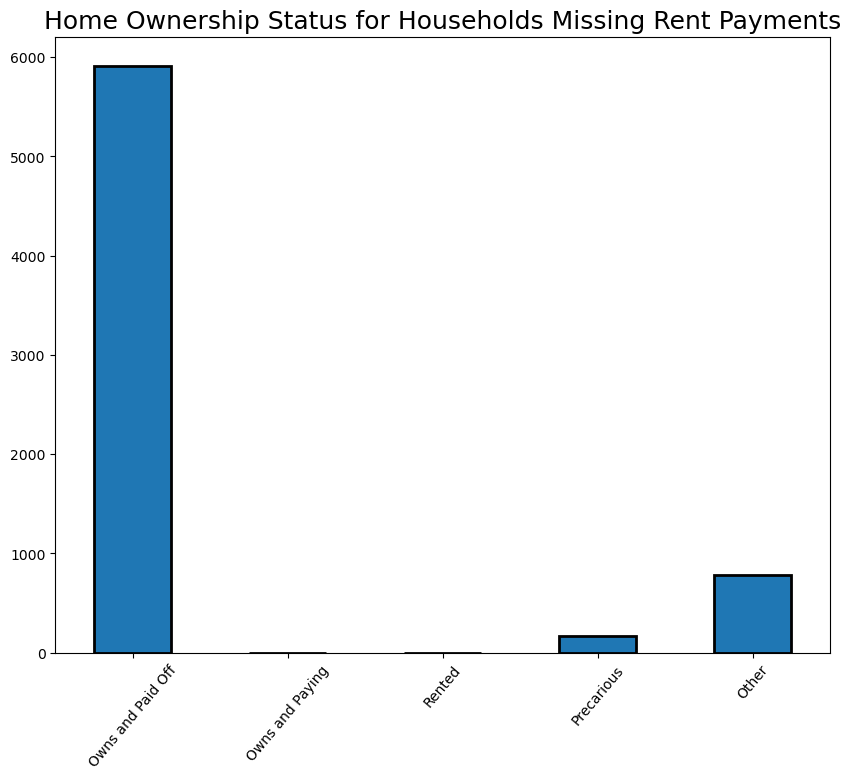

In [26]:
ownership_var = df_train[["tipovivi1","tipovivi2", "tipovivi3","tipovivi4","tipovivi5"]]
ownership_var.loc[df_train['v2a1'].isnull()].sum().plot.bar(figsize=(10, 8), linewidth=2, edgecolor="k")
plt.xticks([0,1,2,3,4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation=50)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18)
plt.show()

In [27]:
df_train["tipovivi3"].value_counts()

0    7821
1    1736
Name: tipovivi3, dtype: int64

##### Majority of the population owns and paid of the mortgages, meaning they won't pay any rent. So the missing value within v2a1 should  should have 0 as a rent, as they won't  pay any rent.

In [28]:
for df in [df_test, df_train]:
    df["v2a1"].fillna(value=0, inplace=True)
df["v2a1"].isnull().sum()

0

 - v18q1: number of tablets household owns
 - v18q, owns a tablet

In [29]:
df["v18q1"].isnull().sum()

7342

In [30]:
df_train[["v18q1","v18q"]].nunique()

v18q1    6
v18q     2
dtype: int64

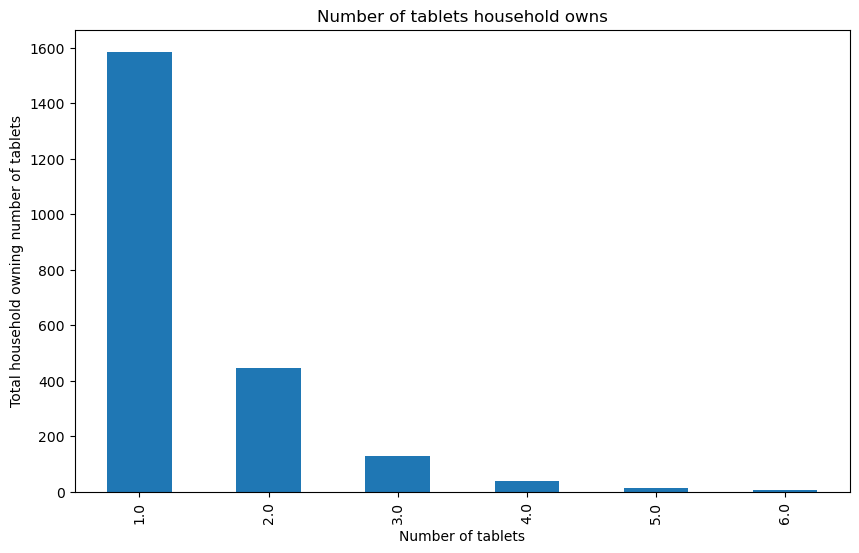

In [31]:
tablet_counts=df_train["v18q1"].value_counts().sort_index()
plt.figure(figsize=(10,6))
chart=tablet_counts.plot.bar()
plt.title("Number of tablets household owns")
plt.xlabel("Number of tablets")
plt.ylabel("Total household owning number of tablets")
plt.show()


In [32]:
total_counts_tablets = tablet_counts.sum()
total_counts_tablets 

2215

#### Total tablet owned is 2215 so out of 9557-7342= 2215, so all the missing value has 0 tablets, we can replace the missing value of v18q1 by 0 

In [33]:
for df in [df_test, df_train]:
    df["v18q1"].fillna(value=0, inplace=True)
df["v18q1"].isnull().sum()

0

#### rez_esc has 7928 missing Values. This is number of years behind in school. Lets find more information. The only possible variable to compare is Age. Here we could drop the column as this varible has 80% missing values. If we want to investigate more. Here we go..

In [34]:
df["rez_esc"].value_counts()

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64

In [35]:
df_train[df_train["rez_esc"].isnull()]["age"].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

#### Total Missing values of 7928 has a min and maximum age range as 0 to 97. Hard to find reliable information with this.

In [36]:
df_train[df_train["rez_esc"].notnull()]["age"].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

#### Existing value within "rez_esc" has a minimum and maximum age of 7-17. In other word, all the value fall within the category

In [37]:
df_train[df_train["rez_esc"].isnull() & ((df_train["age"]>7) & (df_train["age"]<17))]["age"].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

###  It appears that this approach might introduce bias, considering that nearly 80% of the missing values cannot be adequately substituted by 0. I decided to drop this column instead as i clearly see that I won't be able to do any further analysis in this column

In [38]:
df_train.drop(["rez_esc"],axis=1, inplace=True)
df_test.drop(["rez_esc"],axis=1, inplace=True)

In [39]:
print("Test data set:{}".format(df_test.shape))
print("Train data set:{}".format(df_train.shape))

Test data set:(23856, 141)
Train data set:(9557, 142)


#### meaneduc: meaneduc,average years of education for adults (18+)

In [40]:
df_train["meaneduc"].mode()

0    6.0
Name: meaneduc, dtype: float64

In [41]:
df_train["meaneduc"].value_counts()

6.000000     846
11.000000    491
9.000000     398
8.500000     341
10.000000    330
            ... 
23.500000      3
37.000000      3
0.333333       3
32.000000      2
27.000000      2
Name: meaneduc, Length: 155, dtype: int64

In [42]:
df_train["meaneduc"].describe()

count    9552.000000
mean        9.231523
std         4.167694
min         0.000000
25%         6.000000
50%         9.000000
75%        11.600000
max        37.000000
Name: meaneduc, dtype: float64

<Axes: xlabel='meaneduc', ylabel='Density'>

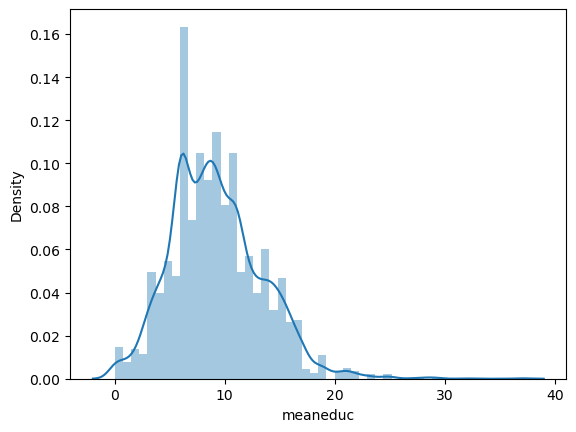

In [43]:
sns.distplot(df_train["meaneduc"])

In [44]:
df_train['meaneduc'].fillna(df_train['meaneduc'].mean(),inplace=True)

In [45]:
df_test['meaneduc'].fillna(df_test['meaneduc'].mean(),inplace=True)

In [46]:
df_train["meaneduc"].isnull().sum()

0

#### SQBmeaned, square of the mean years of education of adults (>=18) in the household

In [47]:
df_train["SQBmeaned"].describe()

count    9552.000000
mean      102.588867
std        93.516890
min         0.000000
25%        36.000000
50%        81.000000
75%       134.560010
max      1369.000000
Name: SQBmeaned, dtype: float64

In [48]:
df_train["SQBmeaned"].mode()

0    36.0
Name: SQBmeaned, dtype: float64

In [49]:
df_train["SQBmeaned"].mean()

102.58886699019682

In [50]:
df_train["SQBmeaned"].value_counts()

36.000000      846
121.000000     491
81.000000      398
72.250000      341
100.000000     330
              ... 
552.250000       3
1369.000000      3
0.111111         3
1024.000000      2
729.000000       2
Name: SQBmeaned, Length: 155, dtype: int64

In [51]:
df_train["SQBmeaned"].mean()

102.58886699019682

<Axes: xlabel='SQBmeaned', ylabel='Density'>

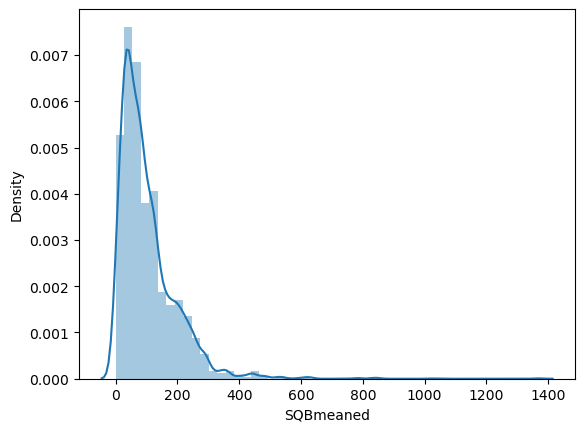

In [52]:
sns.distplot(df_train["SQBmeaned"])

In [53]:
df_train["SQBmeaned"].fillna(np.mean(df_train["SQBmeaned"]), inplace=True)

In [54]:
df_test["SQBmeaned"].fillna(np.mean(df_test["SQBmeaned"]), inplace=True)

In [55]:
df_train.select_dtypes("float").isnull().sum()

v2a1               0
v18q1              0
dependency         0
edjefe             0
edjefa             0
meaneduc           0
overcrowding       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
dtype: int64

- Check whether all members of the house have the same poverty level.
- Check if there is a house without a family head.
- Set poverty level of the members and the head of the house within a family.


#### Check if there are any biases in your dataset.

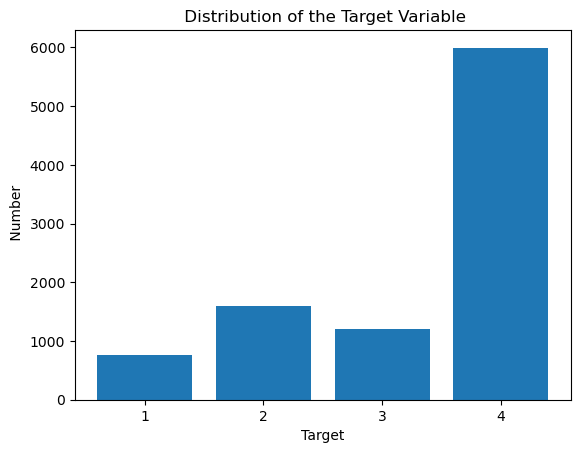

In [56]:
bias_counts = df_train["Target"].value_counts()
plt.bar(bias_counts.index, bias_counts.values)
plt.title(" Distribution of the Target Variable")
plt.xlabel("Target")
plt.ylabel(" Number")
plt.xticks(bias_counts.index)
plt.show()

#### Data is biased towards the 4th class as it has more observation than 1,2 and 3 combined.

### Check whether all members of the house have the same poverty level.

In [57]:
poverty_leb= df_train.groupby("idhogar")["Target"].nunique()!=1
Num_of_poverty=poverty_leb.sum()

In [58]:
print(f"There are {Num_of_poverty} households where the family members do not all have the same target")

There are 85 households where the family members do not all have the same target


### Check if there is a house without a family head.

In [59]:
# Check if there is a house without a family head.
# parentesco1, =1 if household head
#idhogar, Household level identifier
# Count households without a head
households_no_head = df_train[df_train.groupby('idhogar')['parentesco1'].transform('sum') == 0]
num_households_no_head = households_no_head['idhogar'].nunique()
print(f'There are {num_households_no_head} households without a head.')



There are 15 households without a head.



#### Set poverty level of the members and the head of the house within a family.

#### Poverty level has many influence within this data set. But main factor that define the property level are as follows:
 - tipovivi1, =1 own and fully paid house
 - tipovivi3, =1 rented
 - computer, =1 if the household has notebook or desktop computer
 - television, =1 if the household has TV
 - v2a1, Monthly rent paymen
 - cielorazo, =1 if the house has ceiling
 - sanitario1, =1 no toilet in the dwelling
 - instlevel1, =1 no level of education)
#### We can't use the given argument for all but the majority of the decision to set the poverty level can be education, equipments, behaviour, and house owner or not, If renting how much rent / month. 

In [60]:
import numpy as np
# Select relevant columns and fill missing values with 0
poverty_lev =df_train[['v2a1', 'tipovivi1', 'computer', 'television', 'cielorazo', 'sanitario1','instlevel1' ]].fillna(0)
poverty_lev['level'] = poverty_lev[['v2a1', 'tipovivi1', 'computer', 'television', 'cielorazo', 'sanitario1','instlevel1']].sum(axis=1)

# Calculate medians and means
pover_med_rent = (np.median(poverty_lev.loc[poverty_lev['v2a1'] != 0, 'v2a1']) +
                  poverty_lev['tipovivi1'].median() +
                  poverty_lev['computer'].median() +
                  poverty_lev['television'].median() +
                  poverty_lev['cielorazo'].median()+
                  poverty_lev['sanitario1'].median()+
                  poverty_lev['instlevel1'].median() + 1)

pover_med_own = (np.median(poverty_lev.loc[poverty_lev['v2a1'] == 0, 'v2a1']) +
                  poverty_lev['tipovivi1'].median() +
                  poverty_lev['computer'].median() +
                  poverty_lev['television'].median() +
                  poverty_lev['cielorazo'].median()+
                  poverty_lev['sanitario1'].median()+
                  poverty_lev['instlevel1'].median() + 1)

pover_mean_rent = (np.mean(poverty_lev.loc[poverty_lev['v2a1'] != 0, 'v2a1']) +
                  poverty_lev['tipovivi1'].median() +
                  poverty_lev['computer'].median() +
                  poverty_lev['television'].median() +
                  poverty_lev['cielorazo'].median()+
                  poverty_lev['sanitario1'].median()+
                  poverty_lev['instlevel1'].median() + 1)

pover_mean_own = (np.mean(poverty_lev.loc[poverty_lev['v2a1'] == 0, 'v2a1']) +
                  poverty_lev['tipovivi1'].median() +
                  poverty_lev['computer'].median() +
                  poverty_lev['television'].median() +
                  poverty_lev['cielorazo'].median()+
                  poverty_lev['sanitario1'].median()+
                  poverty_lev['instlevel1'].median() + 1)

print('Index as per median for rent', pover_med_rent)
print('Index as per median for Ownership', pover_med_own)
print('Index as per mean for rent', pover_mean_rent)
print('Index as per mean for Ownership', pover_mean_own)

# Function to determine poverty status
def determine_poverty_status(row, threshold_med, threshold_mean):
    if (row['v2a1'] == 0 and row['level'] < threshold_med) or \
       (row['v2a1'] != 0 and row['level'] < threshold_mean):
        return 'Below poverty'
    return 'Above poverty'

# Apply the function to create 'Status(median)' and 'Status(mean)' columns
poverty_lev['Status(median)'] = poverty_lev.apply(determine_poverty_status, args=(pover_med_own, pover_med_rent), axis=1)
poverty_lev['Status(mean)'] = poverty_lev.apply(determine_poverty_status, args=(pover_mean_own, pover_mean_rent), axis=1)

poverty_lev.sample(6)





       



Index as per median for rent 130003.0
Index as per median for Ownership 3.0
Index as per mean for rent 167030.60269865068
Index as per mean for Ownership 3.0


,v2a1,tipovivi1,computer,television,cielorazo,sanitario1,instlevel1,level,Status(median),Status(mean)
9101,0.0,0,0,0,1,0,1,2.0,Below poverty,Below poverty
9374,0.0,1,0,0,0,0,0,1.0,Below poverty,Below poverty
8032,40000.0,0,0,0,0,0,0,40000.0,Below poverty,Below poverty
1863,175000.0,0,1,1,1,0,0,175003.0,Above poverty,Above poverty
3958,0.0,1,0,0,0,0,1,2.0,Below poverty,Below poverty
6367,500000.0,0,0,0,1,0,0,500001.0,Above poverty,Above poverty


In [61]:
poverty_lev['Status(mean)'].value_counts()

Below poverty    6555
Above poverty    3002
Name: Status(mean), dtype: int64

In [62]:
poverty_lev['Status(median)'].value_counts()

Below poverty    6177
Above poverty    3380
Name: Status(median), dtype: int64

### We can from few columns before applying ML models as many columns here an be dropped.
 -  All squared column is not imoportant here, Id & Idhogar variables are also not important for ML.


In [63]:
pd.set_option('display.max_columns', None)
df_train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.00,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.00,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.00,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.00,11.0,0.0,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.00,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,0.0,0,2,2,1,2,3,1,4,5,5,5,9,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,0.25,9.0,0.0,8.25

In [64]:
col_to_fill= ["v18q1", "v2a1"]

for column in col_to_fill:
    df_train[column].fillna(0,inplace=True)
    df_test[column].fillna(0,inplace=True)

In [65]:
df_train[["v18q1", "v2a1"]].head(2)

,v18q1,v2a1
0,0.0,190000.0
1,1.0,135000.0


In [67]:
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', "Id", "idhogar", "v18q", "area2"]
for i in [df_train, df_test]:
    i.drop(columns=cols, inplace=True)
    

In [68]:
df_train.shape

(9557, 129)

In [69]:
df_test.shape

(23856, 128)

#### Predict the accuracy using random forest classifier.
#### Check the accuracy using random forest with cross validation.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [71]:
X=df_train.drop("Target", axis=1)
y= df_train.Target

### Scaling data

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [76]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [77]:
rm_clas=RandomForestClassifier()

In [78]:
rm_clas.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
y_predict=rm_clas.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [84]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9200836820083682
[[ 165   13    0   29]
 [   7  328    4   48]
 [   0   13  227   68]
 [   0    5    4 1479]]
              precision    recall  f1-score   support

           1       0.96      0.80      0.87       207
           2       0.91      0.85      0.88       387
           3       0.97      0.74      0.84       308
           4       0.91      0.99      0.95      1488

    accuracy                           0.92      2390
   macro avg       0.94      0.84      0.88      2390
weighted avg       0.92      0.92      0.92      2390



In [85]:
y_predict_train=rm_clas.predict(X_train)

In [86]:
print(accuracy_score(y_train,y_predict_train))
print(confusion_matrix(y_train,y_predict_train))
print(classification_report(y_train,y_predict_train))

1.0
[[ 548    0    0    0]
 [   0 1210    0    0]
 [   0    0  901    0]
 [   0    0    0 4508]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       548
           2       1.00      1.00      1.00      1210
           3       1.00      1.00      1.00       901
           4       1.00      1.00      1.00      4508

    accuracy                           1.00      7167
   macro avg       1.00      1.00      1.00      7167
weighted avg       1.00      1.00      1.00      7167



In [91]:
# Using Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid=  {"max_depth":[2,3], "max_features":[1,5], "min_samples_split":[2,3], "criterion":["gini", "entropy"],
              "min_samples_leaf":[1,2]}
grid_search=GridSearchCV(rm_clas, param_grid=param_grid, cv=5) # use verbose=2 then it will show how the equasion is working
grid_search.fit(X_train,y_train)  

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'max_features': [1, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]})

In [92]:
y_predict_gs=grid_search.predict(X_test)

In [93]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [96]:
from sklearn.ensemble import RandomForestClassifier
rm_clas=RandomForestClassifier(criterion='gini', max_depth= 3, max_features= 5, min_samples_leaf= 1, min_samples_split=3)
rm_clas.fit(X_train, y_train)
y_pred_gs=rm_clas.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [98]:
print(accuracy_score(y_test,y_pred_gs))
print(confusion_matrix(y_test,y_pred_gs))
print(classification_report(y_test,y_pred_gs))

0.6267782426778242
[[   0   10    0  197]
 [   0   10    0  377]
 [   0    0    0  308]
 [   0    0    0 1488]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       207
           2       0.50      0.03      0.05       387
           3       0.00      0.00      0.00       308
           4       0.63      1.00      0.77      1488

    accuracy                           0.63      2390
   macro avg       0.28      0.26      0.21      2390
weighted avg       0.47      0.63      0.49      2390



In [99]:
y_predict_gs_train=rm_clas.predict(X_train)

In [101]:
print(accuracy_score(y_train,y_predict_gs_train))
print(confusion_matrix(y_train,y_predict_gs_train))
print(classification_report(y_train,y_predict_gs_train))

0.6338774940700432
[[   0   17    0  531]
 [   0   35    0 1175]
 [   0    0    0  901]
 [   0    0    0 4508]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       548
           2       0.67      0.03      0.06      1210
           3       0.00      0.00      0.00       901
           4       0.63      1.00      0.78      4508

    accuracy                           0.63      7167
   macro avg       0.33      0.26      0.21      7167
weighted avg       0.51      0.63      0.50      7167



In [104]:
from sklearn.model_selection import RandomizedSearchCV
param_Random={"max_depth":[2,3,4], "max_features":[1,3,5], "min_samples_split":[2,3,5], "criterion":["gini", "entropy"],
              "min_samples_leaf":[1,2,3]}
random_search= RandomizedSearchCV(rm_clas, param_distributions=param_Random,cv=5, verbose=1)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=3, max_features=5,
                                                    min_samples_split=3),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4],
                                        'max_features': [1, 3, 5],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 5]},
                   verbose=1)

In [108]:
random_search.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 5,
 'max_depth': 4,
 'criterion': 'gini'}

In [110]:
from sklearn.ensemble import RandomForestClassifier
rm_clas=RandomForestClassifier(criterion='gini', max_depth= 4, max_features= 5, min_samples_leaf= 1, min_samples_split=3)
rm_clas.fit(X_train, y_train)
y_pred_rs=rm_clas.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
print(accuracy_score(y_test,y_pred_rs))
print(confusion_matrix(y_test,y_pred_rs))
print(classification_report(y_test,y_pred_rs))

0.6334728033472803
[[   2   21    0  184]
 [   0   24    0  363]
 [   0    0    0  308]
 [   0    0    0 1488]]
              precision    recall  f1-score   support

           1       1.00      0.01      0.02       207
           2       0.53      0.06      0.11       387
           3       0.00      0.00      0.00       308
           4       0.64      1.00      0.78      1488

    accuracy                           0.63      2390
   macro avg       0.54      0.27      0.23      2390
weighted avg       0.57      0.63      0.50      2390



In [113]:
y_pred_rs_train=rm_clas.predict(X_train)

In [115]:
print(accuracy_score(y_train,y_pred_rs_train))
print(confusion_matrix(y_train,y_pred_rs_train))
print(classification_report(y_train,y_pred_rs_train))

0.6454583507743826
[[  11   40    0  497]
 [   0  107    0 1103]
 [   0    3    0  898]
 [   0    0    0 4508]]
              precision    recall  f1-score   support

           1       1.00      0.02      0.04       548
           2       0.71      0.09      0.16      1210
           3       0.00      0.00      0.00       901
           4       0.64      1.00      0.78      4508

    accuracy                           0.65      7167
   macro avg       0.59      0.28      0.24      7167
weighted avg       0.60      0.65      0.52      7167



#### Conclusion :
*Using RandomForest Classifier we can predict test_data with accuracy of 90%+, however the differene with train data is much higher compare to other classifier. 

### Further Investment is needed to make a model accuracy rate higher using all paramaters.